In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle
from sklearn import metrics

In [2]:
df=pd.read_csv('data/liver.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
df.shape

(583, 11)

In [7]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
df.dtypes[df.dtypes=='object']


Gender    object
dtype: object

# EDA

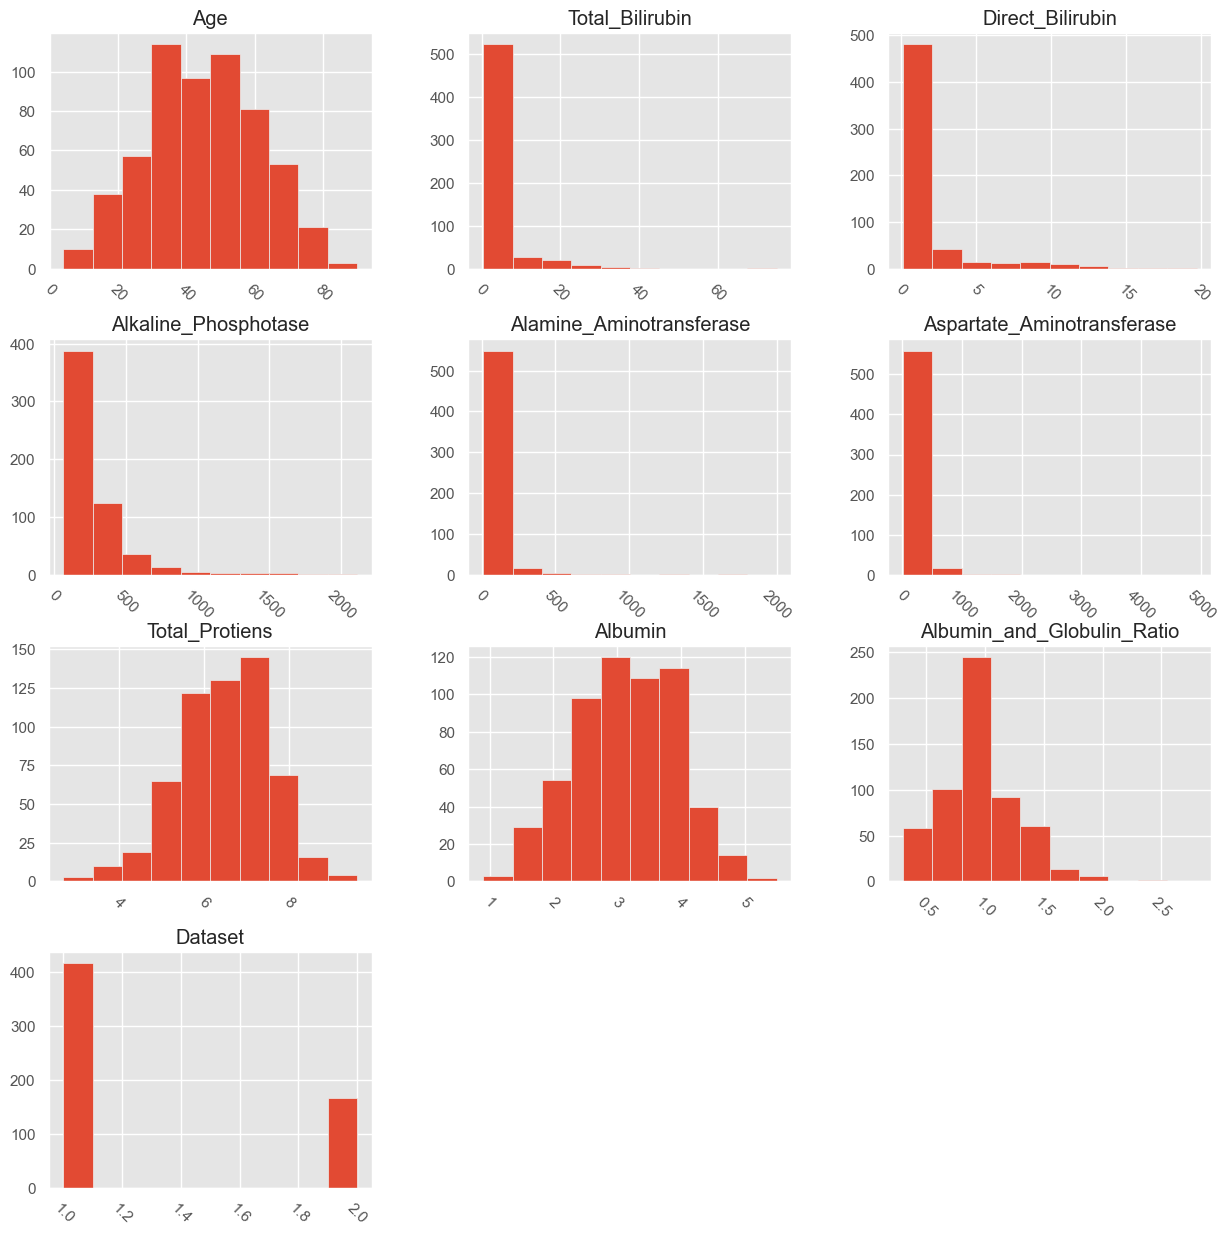

In [9]:
df.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

In [10]:
def convertdataset(x):
    if x==2:
        return 0
    else:
        return 1
df['Dataset']=df['Dataset'].map(convertdataset)

In [11]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [12]:
df.Dataset.value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [13]:

df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [14]:
# Bar plot

<Axes: xlabel='count', ylabel='Gender'>

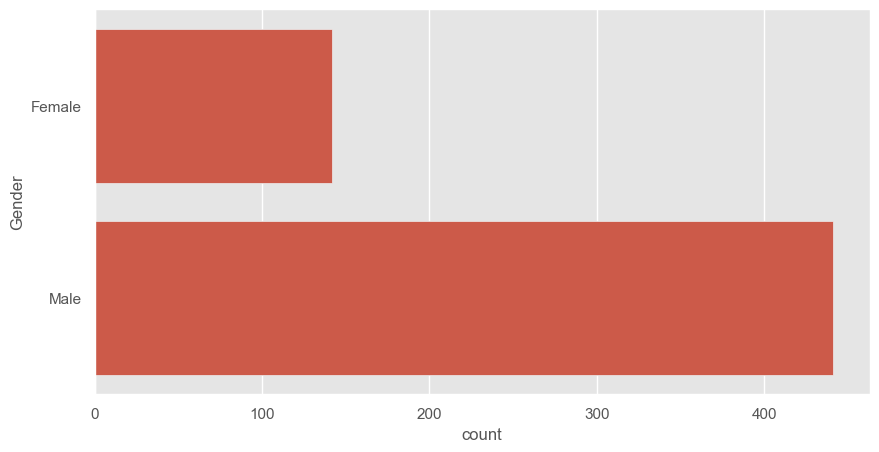

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y='Gender',data=df)

In [16]:
df[df['Gender'] == 'Male'][['Dataset','Gender']]

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male
...,...,...
578,0,Male
579,1,Male
580,1,Male
581,1,Male


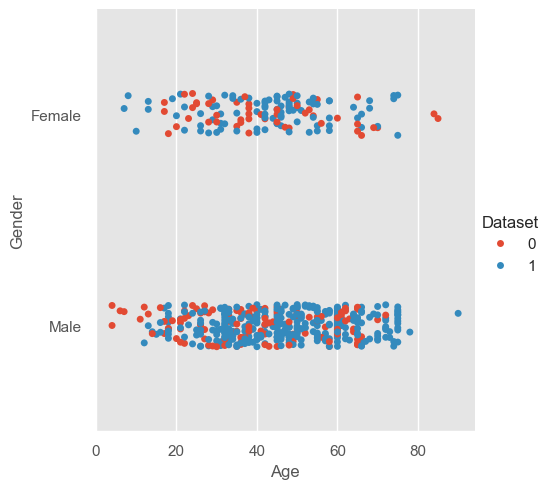

In [17]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)


In [18]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [19]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)

In [20]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


In [22]:
# Positive Correlation-> one feature increases other also increases
# Negative Correlation-> one feature increases other decreases
# closer to 0-> weak relationship

<Axes: >

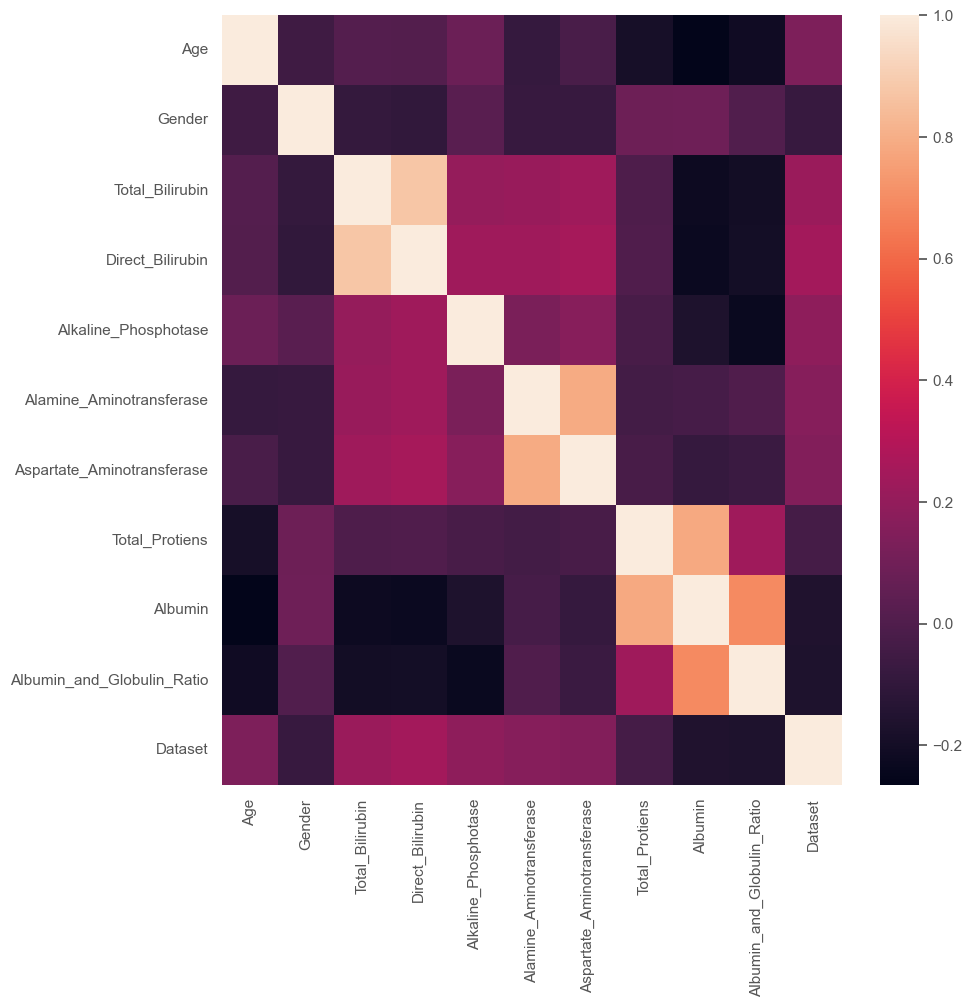

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

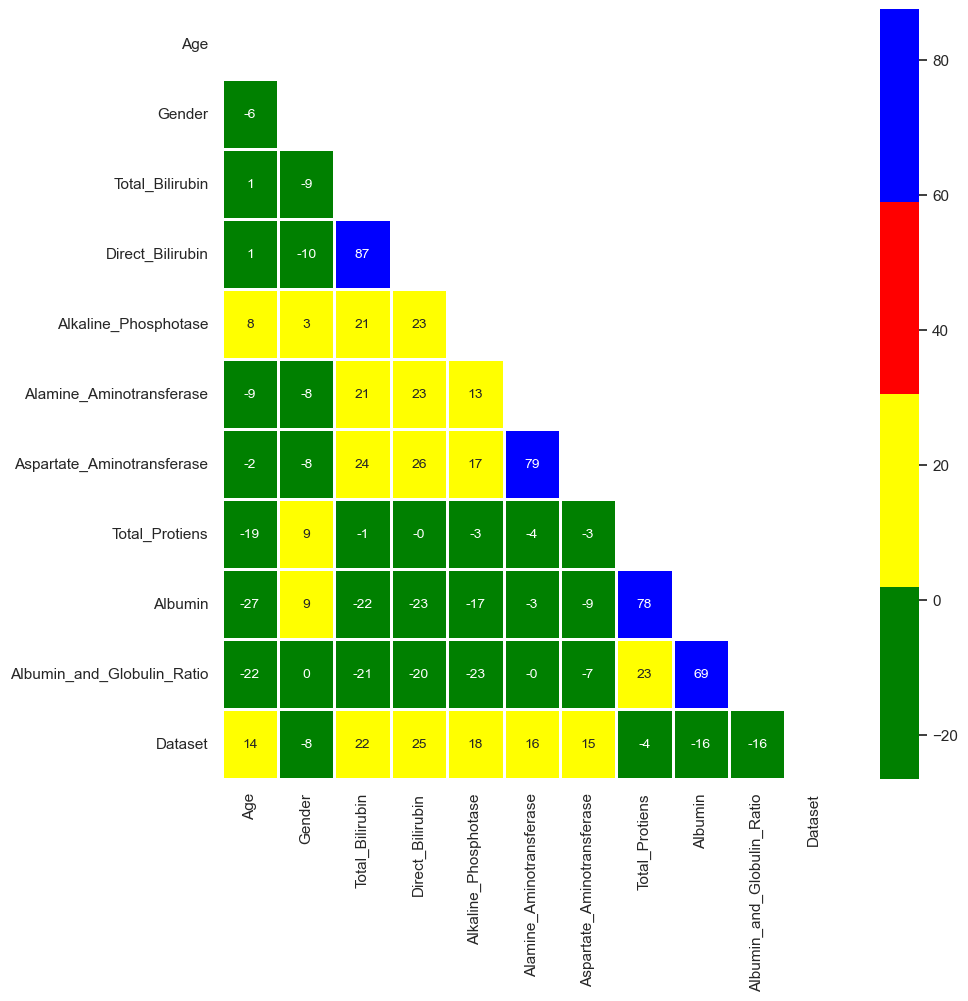

In [24]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [25]:
df = df.drop_duplicates()

In [26]:
df.shape

(570, 11)

In [27]:
# Removing Outlier
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: ylabel='Aspartate_Aminotransferase'>

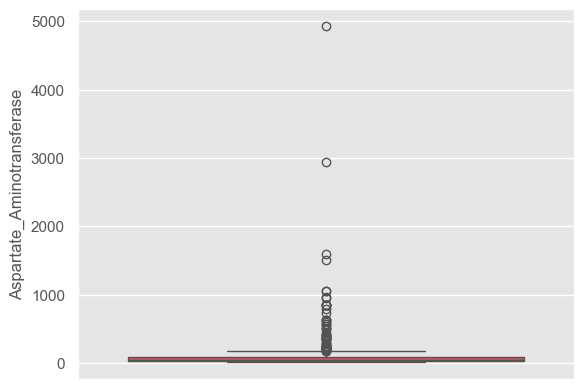

In [28]:
sns.boxplot(df.Aspartate_Aminotransferase)

<Axes: ylabel='Total_Bilirubin'>

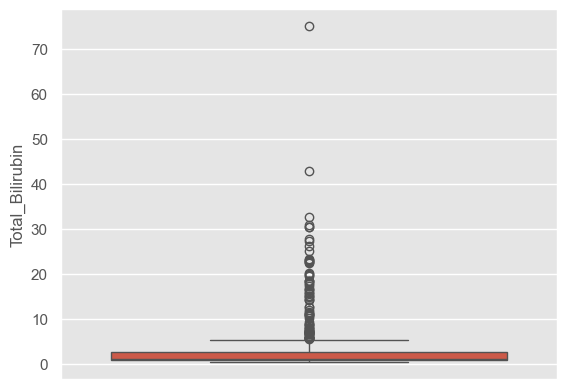

In [29]:
sns.boxplot(df.Total_Bilirubin)

In [30]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [31]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [32]:
df.shape

(569, 11)

In [33]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [34]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [35]:
df = df.dropna(how='any')

In [36]:
# Machine Learning Model
# Data Preparation

In [37]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 565, dtype: int64

In [39]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [40]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)


In [41]:
# Data Standardization
train_mean = X_train.mean()
train_std = X_train.std()

In [42]:
X_train = (X_train - train_mean) / train_std
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,452.000000,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02
mean,0.000000,2.750995e-17,-5.501990e-17,8.645985e-17,4.470367e-17,-7.859986e-18,7.859986e-18,-5.482340e-16,9.431983e-16,-1.267423e-16
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.592411,-5.562902e-01,-4.543837e-01,-4.860049e-01,-9.749601e-01,-3.918562e-01,-4.269997e-01,-3.365429e+00,-2.734378e+00,-2.001960e+00
25%,-0.787678,-5.562902e-01,-3.933899e-01,-4.517931e-01,-4.884459e-01,-3.268882e-01,-3.631847e-01,-6.603182e-01,-7.389168e-01,-7.294443e-01
50%,0.021341,-5.562902e-01,-3.628930e-01,-4.175813e-01,-3.364102e-01,-2.565062e-01,-2.948115e-01,6.104452e-02,-5.297686e-02,-9.318643e-02
75%,0.799243,-5.562902e-01,-1.036693e-01,-7.546284e-02,2.956143e-02,-1.103282e-01,-8.855236e-02,6.020666e-01,7.576794e-01,5.430714e-01
max,2.448396,1.793646e+00,1.092096e+01,6.219516e+00,6.987366e+00,1.038200e+01,1.295136e+01,2.856325e+00,3.002574e+00,4.996876e+00


In [43]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,-0.251269,0.088383,-0.042001,-0.037618,0.079833,-0.116557,-0.075533,0.278092,0.339383,0.310246
std,1.040025,1.053163,0.771026,0.849612,1.269947,0.709762,0.761506,0.871709,0.917068,1.045688
min,-2.156786,-0.556290,-0.439135,-0.486005,-0.801205,-0.386442,-0.431558,-1.922703,-1.611931,-1.683831
25%,-0.912142,-0.556290,-0.393390,-0.451793,-0.471070,-0.310646,-0.363185,-0.299637,-0.364768,-0.411315
50%,-0.352052,-0.556290,-0.347645,-0.383369,-0.384193,-0.251092,-0.281137,0.421726,0.383530,0.224942
75%,0.519198,1.793646,-0.149415,-0.109675,0.097977,-0.148226,-0.062343,0.782407,1.131828,0.861200
max,2.759557,1.793646,3.708444,3.790475,7.916956,6.862903,6.816001,2.225133,2.254276,5.951263


In [44]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.7168141592920354
0.7787610619469026
[[12 20]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.71      0.38      0.49        32
           1       0.79      0.94      0.86        81

    accuracy                           0.78       113
   macro avg       0.75      0.66      0.67       113
weighted avg       0.77      0.78      0.75       113



In [47]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
knn.predict(X_test)


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [49]:
print(accuracy_score(y_train, lr.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.7168141592920354
0.6902654867256637
[[15 17]
 [18 63]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        32
           1       0.79      0.78      0.78        81

    accuracy                           0.69       113
   macro avg       0.62      0.62      0.62       113
weighted avg       0.69      0.69      0.69       113



In [50]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [51]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [52]:
grid_search.best_score_

0.7145787545787546

In [53]:
svc= SVC(C=0.01, gamma=0.0001,probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [54]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))

0.7123893805309734
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.6371681415929203
[[17 15]
 [26 55]]
              precision    recall  f1-score   support

           0       0.40      0.53      0.45        32
           1       0.79      0.68      0.73        81

    accuracy                           0.64       113
   macro avg       0.59      0.61      0.59       113
weighted avg       0.68      0.64      0.65       113



In [57]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [58]:
grid_seach_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

In [59]:
grid_seach_dt.best_score_

0.7344054580896685

In [60]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=7, min_samples_split=3, splitter='best')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=3)

In [61]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

0.745575221238938
0.6460176991150443
[[ 3 29]
 [11 70]]
              precision    recall  f1-score   support

           0       0.21      0.09      0.13        32
           1       0.71      0.86      0.78        81

    accuracy                           0.65       113
   macro avg       0.46      0.48      0.45       113
weighted avg       0.57      0.65      0.59       113



In [62]:
# Random  Forest
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [63]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
print(classification_report(y_test, rand_clf.predict(X_test)))

0.9048672566371682
0.7079646017699115
[[13 19]
 [14 67]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        32
           1       0.78      0.83      0.80        81

    accuracy                           0.71       113
   macro avg       0.63      0.62      0.62       113
weighted avg       0.69      0.71      0.70       113



In [64]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [65]:
grid_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [66]:
grid_search_gbc.best_score_

0.7126482213438734

In [67]:
gbc = GradientBoostingClassifier(learning_rate=0.001, loss='exponential',n_estimators=100)
gbc.fit(X_train , y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [68]:
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
print(confusion_matrix(y_test, gbc.predict(X_test)))
print(classification_report(y_test, gbc.predict(X_test)))

0.7123893805309734
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [69]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

0.7123893805309734
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [71]:
# Model Comparison
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [72]:
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regreesion,77.88
2,SVC,71.68
5,Gradient Boosting Classifer,71.68
6,XgBoost,71.68
4,Random Forest Classifier,70.80
1,KNN,69.03
3,Decision Tree Classifier,64.60


In [73]:
import pickle
model = lr_acc
pickle.dump(model, open("model/liver.pkl","wb"))

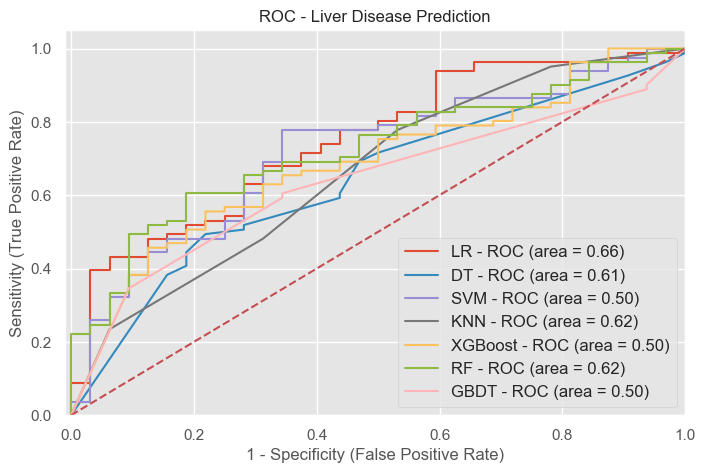

In [74]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[77.88000000000001, 64.60000000000001, 71.67999999999999, 69.03, 71.67999999999999, 70.8, 71.67999999999999]
[65.66, 52.580000000000005, 50.0, 62.33, 50.0, 61.050000000000004, 50.0]


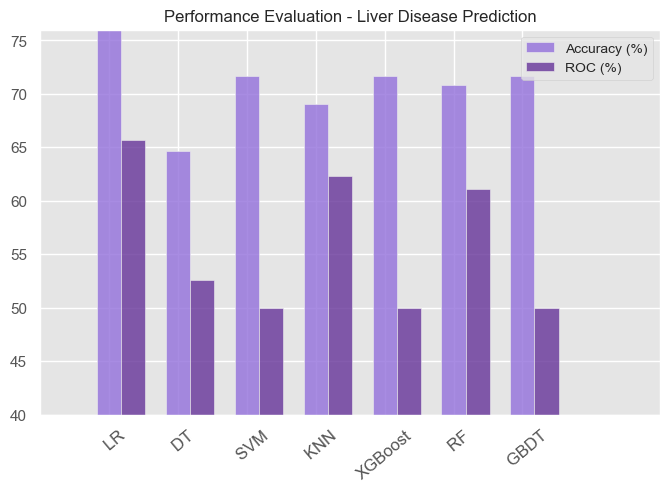

In [75]:
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()